In [1]:
import pandas
import numpy
from matplotlib import pyplot
import os
import ROOT

Welcome to JupyROOT 6.24/06


# Python timer

In [2]:
times = {"nodes":[],"meanruntime":[], "err":[], "throughput_MB_s":[]}
timedir = "20211115-8corespernode-nopinning/appruntimes"
datasetsize = 157400503680
readpercent = 0.7949011466389114
readsize = datasetsize * readpercent # taken from the RNTuple metrics above

for f in os.listdir(timedir):
    array = numpy.genfromtxt(os.path.join(timedir, f), skip_header=2)
    nodes = f.split("_")[5].replace("nodes","")
    time_mean = numpy.mean(array)
    times["nodes"].append(int(nodes))
    times["meanruntime"].append(round(time_mean, 2))
    times["err"].append(round(numpy.std(array)/numpy.sqrt(len(array)), 2))
    times["throughput_MB_s"].append(round(readsize/time_mean/pow(10,6)))

timesdf_8 = pandas.DataFrame(times)
timesdf_8 = timesdf_8.sort_values(by="nodes").reset_index(drop=True).copy()
throughput_1node_8 = timesdf_8["throughput_MB_s"][0]
time_1node_8 = timesdf_8["meanruntime"][0]
timesdf_8["runtimespeedup"] = time_1node_8 / timesdf_8["meanruntime"]
timesdf_8["throughputspeedup"] = timesdf_8["throughput_MB_s"] / throughput_1node_8
timesdf_8

,nodes,meanruntime,err,throughput_MB_s,runtimespeedup,throughputspeedup
0,1,26.51,0.45,4719,1.000000,1.000000
1,2,14.84,0.23,8430,1.786388,1.786395
2,3,10.62,0.13,11776,2.496234,2.495444
3,4,7.94,0.07,15763,3.338791,3.340326
4,5,6.76,0.08,18508,3.921598,3.922017
5,6,6.08,0.12,20573,4.360197,4.359610


In [3]:
times = {"nodes":[],"meanruntime":[], "err":[], "throughput_MB_s":[]}
timedir = "20211115-16corespernode-nopinning/appruntimes"
datasetsize = 157400503680
readpercent = 0.7949011466389114
readsize = datasetsize * readpercent # taken from the RNTuple metrics above

for f in os.listdir(timedir):
    array = numpy.genfromtxt(os.path.join(timedir, f), skip_header=2)
    nodes = f.split("_")[5].replace("nodes","")
    time_mean = numpy.mean(array)
    times["nodes"].append(int(nodes))
    times["meanruntime"].append(round(time_mean, 2))
    times["err"].append(round(numpy.std(array)/numpy.sqrt(len(array)), 2))
    times["throughput_MB_s"].append(round(readsize/time_mean/pow(10,6)))

timesdf_16 = pandas.DataFrame(times)
timesdf_16 = timesdf_16.sort_values(by="nodes").reset_index(drop=True).copy()
throughput_1node_16 = timesdf_16["throughput_MB_s"][0]
time_1node_16 = timesdf_16["meanruntime"][0]
timesdf_16["runtimespeedup"] = time_1node_16 / timesdf_16["meanruntime"]
timesdf_16["throughputspeedup"] = timesdf_16["throughput_MB_s"] / throughput_1node_16
timesdf_16

,nodes,meanruntime,err,throughput_MB_s,runtimespeedup,throughputspeedup
0,1,22.15,0.27,5649,1.000000,1.000000
1,2,13.85,0.23,9034,1.599278,1.599221
2,3,10.15,0.13,12326,2.182266,2.181979
3,4,7.88,0.14,15884,2.810914,2.811825
4,5,6.39,0.05,19585,3.466354,3.466985
5,6,5.96,0.20,20993,3.716443,3.716233


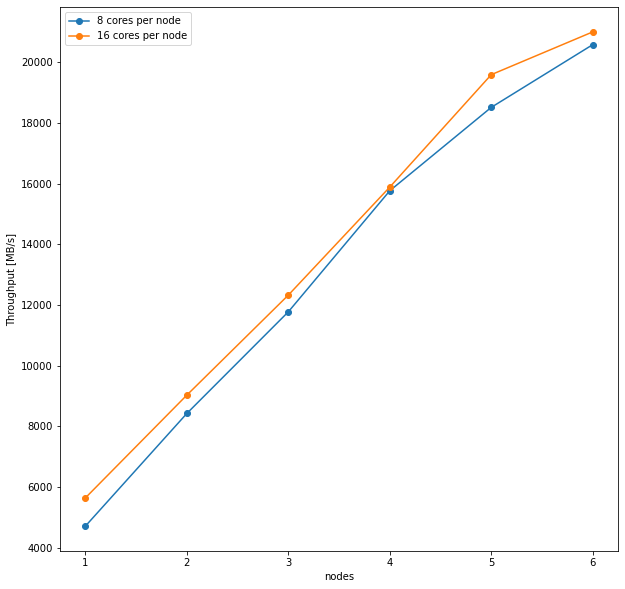

In [4]:
pyplot.figure(figsize=[10,10])
pyplot.plot(timesdf_8["nodes"], timesdf_8["throughput_MB_s"], label="8 cores per node", marker="o")
pyplot.plot(timesdf_16["nodes"], timesdf_16["throughput_MB_s"], label="16 cores per node", marker="o")
pyplot.xlabel("nodes")
pyplot.ylabel("Throughput [MB/s]")
pyplot.legend()

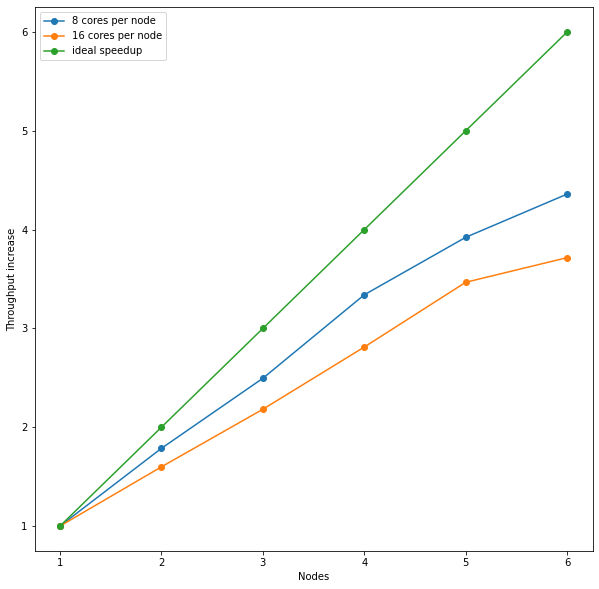

In [5]:
pyplot.figure(figsize=[10,10])
pyplot.plot(timesdf_8["nodes"], timesdf_8["throughputspeedup"], label="8 cores per node", marker="o")
pyplot.plot(timesdf_16["nodes"], timesdf_16["throughputspeedup"], label="16 cores per node", marker="o")
pyplot.plot(timesdf_8["nodes"], timesdf_8["nodes"], label="ideal speedup", marker="o")
pyplot.xticks(timesdf_8["nodes"])
pyplot.yticks(timesdf_8["nodes"])
pyplot.xlabel("Nodes")
pyplot.ylabel("Throughput increase")
pyplot.legend()